<a href="https://colab.research.google.com/github/hariseldon99/scientific-python-lectures/blob/master/Lecture-2-Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib - Plotting Datasets in Python

J.R. Johansson (jrjohansson at gmail.com)

Modified by Analabha Roy (daneel@utexas.edu)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline
import numpy as np

In [2]:
# OPTIONAL: Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

Matplotlib is designed to be similar to (and as usable as) [MATLAB](https://www.mathworks.com/products/matlab.html), a well-known (but not freely available) software for scientific and technical computing. For this reason, matplotlib was originally named to sound similar to MATLAB. Since then, its development has gone beyond MATLAB and is now significantly more powerful and flexible. In additition, matplotlib has the ability to use Python (unlike MATLAB), and has the added advantage of being free and open-source.

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

There are three ways to use matplotlib:

1. The full matplotlib API: This is the most powerful way. However, it has a sharp learning curve, especially for people who are inexperienced with object-oriented programming.
2. The `matplotlib.pyplot` submodule: This is a sub-module of matplotlib that is easier to use than the full module, but is more functionally limited. The design has some similarities with MATLAB.
3. The `pylab` module: This comes bundled with matplotlib, and is the easiest  to use. It is designed to be identical to MATLAB. However, it is not generally recommended due to its highly limited functionality.

We shall elect to use the most optimum way, the second. To get started using Matplotlib in a Python program, import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [3]:
import matplotlib.pyplot as plt

# OPTIONAL: Set default figure size and font size
# For details on what this is, goto the last section of this notebook
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 30

## The matplotlib.pyplot submodule: A Trivial Example

If we want to do a simply $xy$ plot of data, where the $x-$axis and $y-$axis data are present as two separate python lists or `NumPy` arrays, all you have to do is take the `plt` name imported above, use the `plt.plot()` function with the $x$ and $y$ arrays as arguments, then tell `plt` to display the result with the function `plt.show()`.

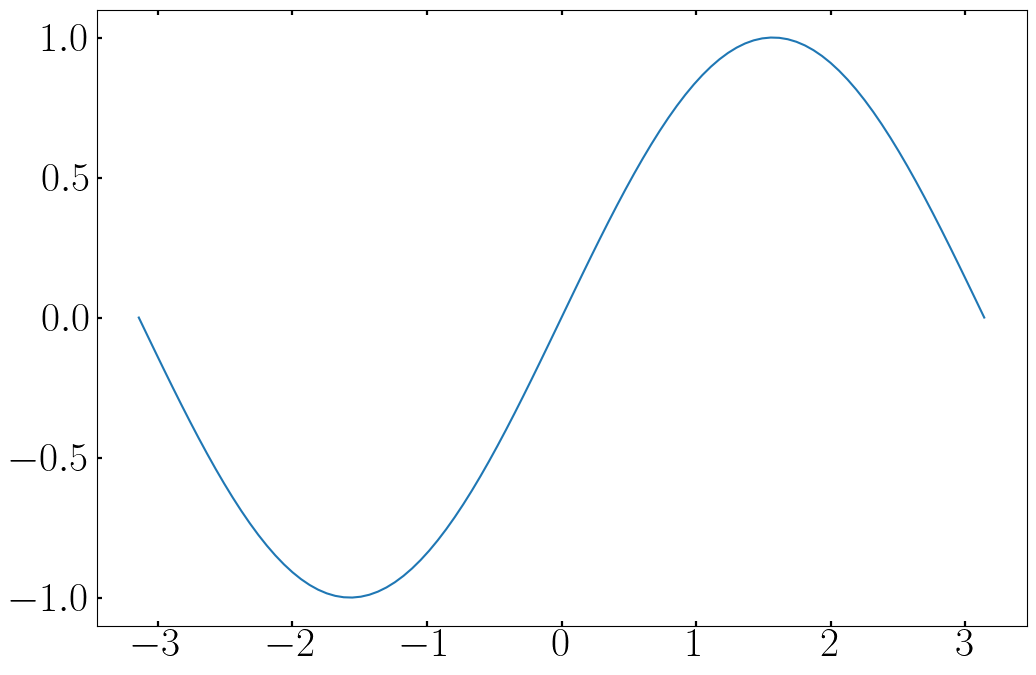

In [4]:
# Prepare the data
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.plot(x,y)
plt.show()

Note that, once `plt.show()` is executed successfully, the existing plt data is deleted inside `plt`.

You can add as many plots to this as you want. You can also create plot titles, $x$ and $y$ labels using the `plt.xlabels()` and `plt.ylabels()` functions.

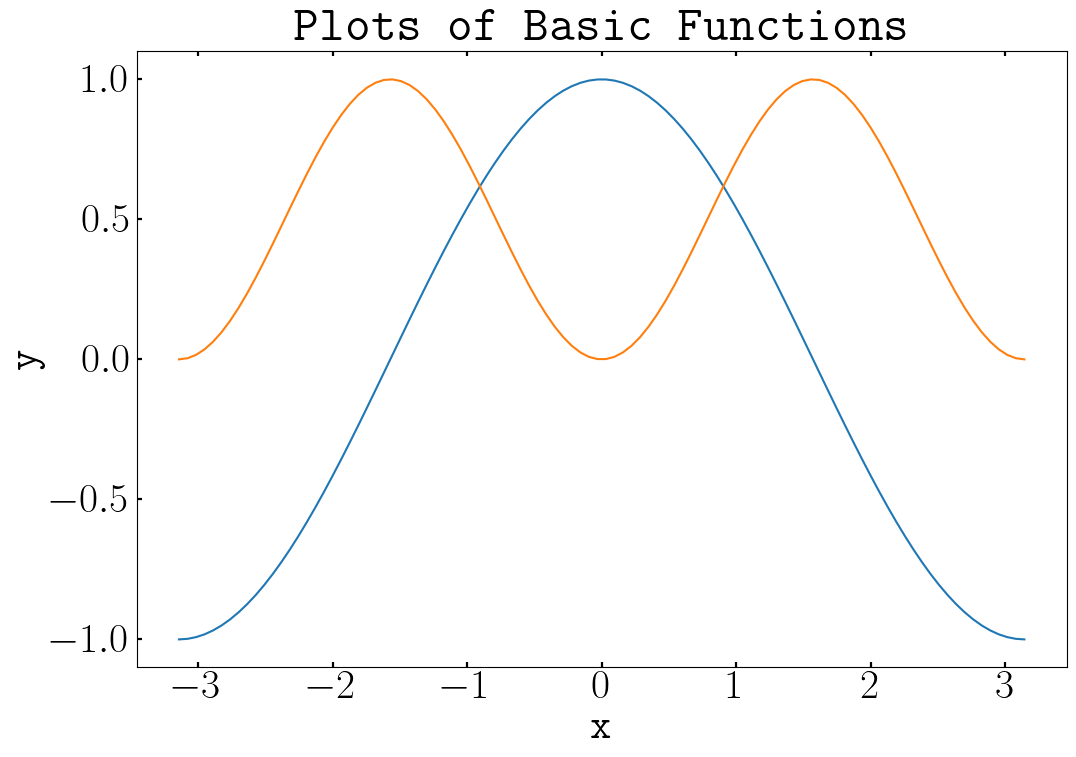

In [5]:
# Prepare the data
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x)**2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of Basic Functions')
plt.show()

Note that the plot data from `np.sin(x)` put into `plt` in the previous code cell is gone.

If you just want to plot the points without drawing any lines connecting them, you can use the `plt.scatter()` function

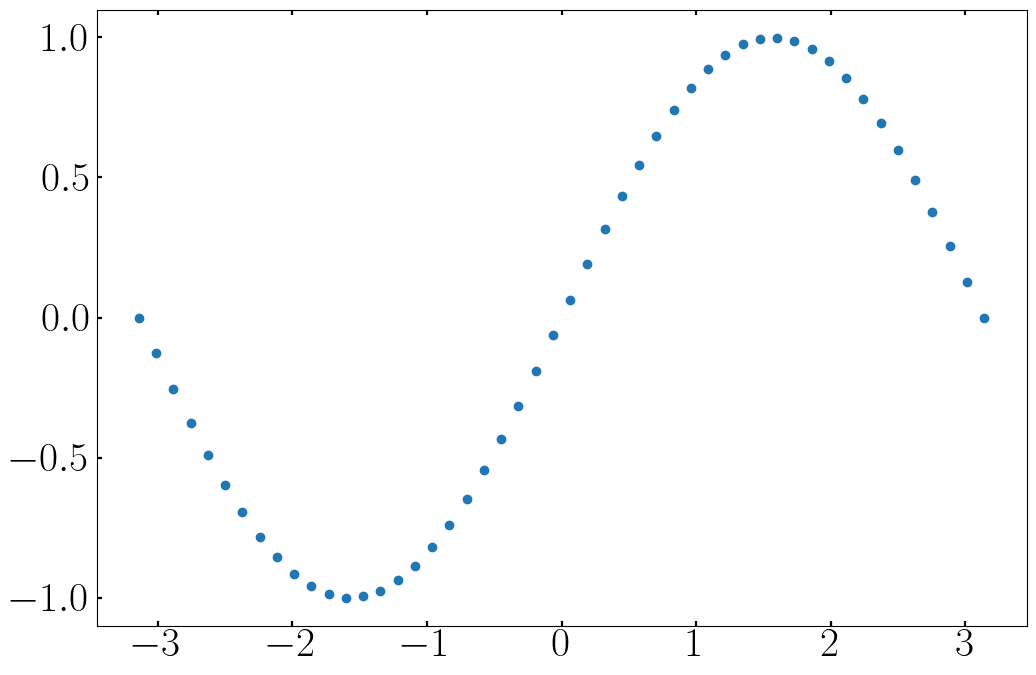

In [6]:
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.scatter(x,y)
plt.show()

## The matplotlib object-oriented API: A Simple Example

If you have lots of complex scientific and technical data that you need to plot, you may need to go beyond the example above and do more complex things with the matplotlib API. The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as with MATLAB). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API, we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `ax` using the `add_axes` method in the `Figure` class instance `fig`:

In [ ]:
# Prepare the data
x = np.linspace(0.0, 5.1, 200)
y = x**2

# Prepare the figure
fig = plt.figure()

# Prepare the x and y axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

#Plot the data in the axes
ax.plot(x, y, 'r')

#Set the axes titles and labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

# Show the plot
plt.show()

## The matplotlib.pyplot Workflow

So, let us summarize the workflow for creating a single plot. Assuming that you have imported `matplotlib.pyplot` into a name, say `plt`, and prepared your data as `NumPy` arrays (or regular python lists or tuples), you must:

1. Create a *Figure Canvas* as an object inside `plt` using `plt.figure()` and assign it to a variable, say `fig`. 
2. For each $xy$ dataset, add a pair of $xy$ axes as an object inside the canvas using `fig.add_axes()` and assign it to a variable, say `ax`.
3. For each `ax`, prepare the plot of the data you want to put in `ax` using `ax.plot()`
4. Optionally, set the titles and labels for the $x$ and $y$ axes for each `ax` object.
5. Display the plot with `plt.show()`

## The matplotlib.pyplot API: Defaults and More Complex Examples
Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure. Suppose we want to add another data plot as an inset to the previous one.

In [ ]:
fig = plt.figure() # Note that this clears any previous canvasses in `plt`

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

# insert
ax2.plot(y, x, 'gray')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('inset title');
plt.show()

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
plt.show()

If you want to create two subplots, the easiest way is to supply the layout as keyword arguments to `plt.subplots()`. This is easier than the above-mentioned method manipulating individual axes layouts.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

#axes is an array of two 'ax' objects
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout() # Just in case the axes overlap
plt.show()

As an exercise, display the value of `axes` to check if it is an array or not.

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an $1200\times 600$ pixel, $100$ DPI figure, we can do: 

In [ ]:
fig = plt.figure(figsize=(12,6), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
plt.show()

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [ ]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added by using the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure:

In [ ]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

If curves are added or removed from the figure, the legend is automatically updated accordingly.

The following figure shows how to use the figure title, axis labels and legends described above:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
ax.legend()
plt.show()

### Setting Colors and Line-Styles

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [ ]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="blue")       
ax.plot(x, x+3, color="green")
plt.show()

For scatter plots, you can control the size and color of the scatter points with the `s` and `c` keyword arguments, respectively. The shape of the markers can also be controlled with the `markers` keyword argument.

In [ ]:
fig, ax = plt.subplots()

x = np.arange(20)

ax.scatter(x, x+1, c="red") # half-transparant red
ax.scatter(x, x+3, c="blue", s=75)       
ax.scatter(x, x+5, c="green", marker="^", s=300)
plt.show()

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");
plt.show()

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
plt.show()

## Plots with Error Bars

If you have to plot experimental or simulation data that have errors, you need to use the `plt.errorbar()` or `axis.errorbar()` functions. The errors are passed as keyword arguments `xerr`, `yerr`. They can either be constants (if the errors are fixed) or lists/`numpy` arrays (if the errors vary with the data).

In [ ]:
# example data
xval = np.linspace(0.01, 4, 20)
yval = np.exp(-xval)
  
plt.errorbar(xval, yval, yerr = 0.05, capsize=5, ecolor='g', label="Exp Decay")
plt.legend()
plt.title('matplotlib errorbar example')
plt.show()

In [ ]:
# Variable errors
xdata = [0, 1, 2, 3, 4, 5]
ydata = [ 4.3,  7.7, 11.1, 14.5, 17.9, 21.3]
errors = [1.5, 1.4, 0.6, 1.5, 1.3, 0.2]

fig, ax = plt.subplots()
ax.errorbar(xdata, ydata, yerr = errors, capsize=5, ecolor='b', linestyle='none');
ax.scatter(xdata, ydata)
plt.show()

Note the use of the `capsize` and `ecolor` keyword arguments to control the size of the errorbar caps and color of the errorbars, respectively. Also note that, if you want to remove the connecting lines, set the keyword argument `linestyle` to the string 'none'. 

**Caution:** Setting `linestyle=None` does not work. That is to say, you have to set it to the string "none", not the standard python null object `None`

## Adding Gridlines to Plots

With experimental data, you might need to add a lattice grid to your plot (much like you see in plots hand-drawn on graph paper). Just use the `plt.grid()`, or `ax.grid()` function:

In [ ]:
x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.plot(x, y)
plt.grid()
plt.show()

## Histogram

Here is the example from the `numpy` lecture again. based on your newfound knowledge of `matplotlib`, study this example and figure out how to plot data in histograms.

In [ ]:
import numpy as np
data = np.genfromtxt('stockholm_td_adj.dat')

months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Optional: Matplotlib Runtime Configuration
You can customize matplotlib by changing the default settings in several ways. The simplest way is to set the so-called *Runtime Configuration Parameters*. All `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. These *rcParams* are best modified directly in your program as shown, for example, in the first cell of this notebook:

In [ ]:
#Set default figure size and font size
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

data = np.random.randn(50)
plt.plot(data)
plt.show()

In [ ]:
# This sets the default linewidth and linestyle
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

Run the command `help(plt.rcParams)` for a full list of configurable rcParams. Also, see the matplotlib manual page on [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

You can also set runtime configuration parameters in the `matplotlibrc` file that is present in your operating system. To know where it is, import the full matplotlib module and run the following commands:

In [ ]:
import matplotlib
matplotlib.get_configdir()

Note that different users will get different results, depending on their operating system and login userid. If you want to learn how to edit and configure it, then click on the 'Customizing Matplotlib' link above for details.

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcasing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* https://scipy-lectures.org/intro/matplotlib/ - Another good matplotlib reference.
* https://computation.physics.utoronto.ca/tutorials/tutorial-part-5-numpy-scipy-and-matplotlib/ - Another good matplotlib tutorial.
* https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb - Robert Johansson's Matplotlib tutorial (on which this notebook is based)
* https://plotly.com/python/ - Plotly.py is another python library for the visualization of scientific and technical data.